&nbsp;

&nbsp;

&nbsp;


# ... vs Julia
### Data analysis oriented comparative 
---

&nbsp;

&nbsp;

&nbsp;

&nbsp;

**Jordi Deu-Pons**

@elbioc

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Syntax and typing

In [1]:
function my_not_typed_method(x, y)
    if x != y 
        print("Not equal")
    end
    x * y
end

my_not_typed_method (generic function with 1 method)

In [ ]:
my_not_typed_method(1, 2)

Not equal

2

In [3]:
my_not_typed_method("a", "b")

Not equal

"ab"

# Multiple dispatch

In [4]:
function my_not_typed_method(x::Integer, y::Integer)
    if x != y
        print("Not equal")
    end
    x + y
end

my_not_typed_method (generic function with 2 methods)

In [5]:
my_not_typed_method(1, 2)

Not equal

3

In [6]:
my_not_typed_method("a", "b")

Not equal

"ab"

In [7]:
my_not_typed_method(0.3, 0.2)

Not equal

0.06

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Loops performance

In [9]:
@time begin
   total = 0
   for i = 0:100000000
       total += i
   end    
end
total

  2.838715 seconds (200.00 M allocations: 2.980 GiB, 2.85% gc time)


5000000050000000

In [10]:
function test_loop(ini_value)
   total = ini_value
   for i = 1:100000000
       total += i
   end    
   total
end

@time test_loop(3)
@time test_loop(5)

  0.008951 seconds (981 allocations: 52.497 KiB)
  0.000002 seconds (5 allocations: 176 bytes)


5000000050000005

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Arrays performance

In [ ]:
function test_array()
   my_array = []
   for i = 1:50000000
       append!(my_array, i)
   end    
end

@time test_array()
@time test_array()

  3.553805 seconds (50.00 M allocations: 1.246 GiB, 56.49% gc time)
  1.498201 seconds (50.00 M allocations: 1.246 GiB)


## Preallocation

In [39]:
function test_array()
   my_array = Array{Integer}(50000000)
   for i = 1:50000000
       my_array[i] = i
   end    
end


@time test_array()
@time test_array()

  1.130142 seconds (50.00 M allocations: 1.118 GiB, 27.57% gc time)
  1.591546 seconds (50.00 M allocations: 1.118 GiB, 50.34% gc time)


&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Dict performance

In [40]:
function test_dict()
    my_dict = Dict(v => v for v = 0:(10000000-1))
    total = 0
    for i = 0:(10000000-1)
        total += my_dict[i]
    end

    total
end           

@time test_dict()
@time test_dict()

  2.442995 seconds (11.20 k allocations: 541.764 MiB)
  2.363757 seconds (78 allocations: 541.171 MiB)


49999995000000

# String performance

In [1]:
function test_string()
    c = "abcdefghij"
    result = ""
    for i = 1:500000
        result *= c[rand(1:10)]
    end
    result
end

@time r = test_string()
@time length(matchall(r"[g-j][d-f][a-c]", r))

 12.536407 seconds (502.27 k allocations: 116.464 GiB, 11.50% gc time)
  0.005766 seconds (124.95 k allocations: 2.680 MiB)


17864

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Parallelization

In [4]:
addprocs(4)

4-element Array{Int64,1}:
 2
 3
 4
 5

In [9]:
function test_parallel()
    sum = @parallel (+) for i = 1:30000
        [rand(1:i) for j = 1:10000]
    end
    sum
end

@time test_parallel()

 12.264255 seconds (10.73 k allocations: 1.093 MiB)


10000-element Array{Int64,1}:
 225350054
 224609334
 224940262
 226458485
 225286474
 224091837
 224996780
 225913344
 225716955
 224163910
 224880795
 224017085
 224811743
         ⋮
 224403555
 224953699
 225419091
 224611000
 226252255
 223418746
 225554644
 223518420
 222107297
 225733517
 225314778
 224509246

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# File manipulation

In [17]:
open("ICGC_WXS_BRCA_KR.tsv") do fd
    for r in eachline(fd)
        print(r)
        break
    end
end

CHROMOSOME	POSITION	REF	ALT	SAMPLE	ID

# Dataframe

In [ ]:
using DataFrames, CSV

In [2]:
@time data = CSV.read("ICGC_WXS_BRCA_KR.tsv", 
    delim='\t', 
    types= Dict("CHROMOSOME"=>String)
)

head(data)

  7.531191 seconds (10.97 M allocations: 407.253 MiB, 1.68% gc time)


,CHROMOSOME,POSITION,REF,ALT,SAMPLE,ID
1,10,107012568,C,T,TCGA-3N-A9WB-06A-11D-A38G-08,I0000000000
2,10,120354453,G,C,TCGA-3N-A9WB-06A-11D-A38G-08,I0000000001
3,10,122334682,C,T,TCGA-3N-A9WB-06A-11D-A38G-08,I0000000002
4,10,124345791,G,A,TCGA-3N-A9WB-06A-11D-A38G-08,I0000000003
5,10,1262983,G,A,TCGA-3N-A9WB-06A-11D-A38G-08,I0000000004
6,10,129905609,C,G,TCGA-3N-A9WB-06A-11D-A38G-08,I0000000005


&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Plots

In [1]:
using PyPlot

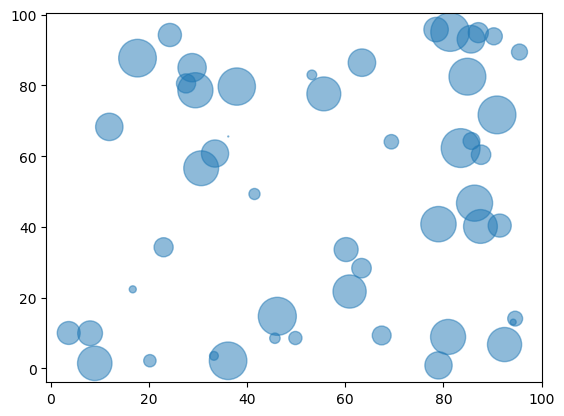

PyObject <matplotlib.collections.PathCollection object at 0x7f38180c3048>

In [3]:
x = 100*rand(50)
y = 100*rand(50)
areas = 800*rand(50);
scatter(x,y,s=areas,alpha=0.5)

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Statistics

https://github.com/JuliaStats

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Julia strengths

* Loops performance
* Numerical analysis oriented (Numpy like arrays)
* DataFrames and loops are friends
* Just In Time compiler
* Mix typed and not typed code
* Parallelization